## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from sklearn.svm import SVC
from sklearn import datasets 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import (
    classification_report, 
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve
)

## Read

In [42]:
#reading dataset
x = pd.read_excel("C:/Ass/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

In [43]:
print(x.shape)

(1925, 231)


In [44]:
x.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [45]:
x.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineering
The process of transforming data to improve the predictive performance of machine learning models is known as feature engineering.

In [6]:
#find any categorical feature
cat_features = list(x.select_dtypes(exclude=['number']).columns)
print(cat_features)

['AGE_PERCENTIL', 'WINDOW']


In [7]:
#unique values from the column
set(x["AGE_PERCENTIL"].values)

{'10th',
 '20th',
 '30th',
 '40th',
 '50th',
 '60th',
 '70th',
 '80th',
 '90th',
 'Above 90th'}

In [8]:
#function to transform the percentil column values to int
def agr_perc_to_int(percentil):
    if percentil == "Above 90th":
        return(100)
    else:
        return(int("".join(c for c in str(percentil) if c.isdigit())))

In [9]:
#result of function applied
x["AGE_PERCENTIL"] = x.AGE_PERCENTIL.apply(lambda x: agr_perc_to_int(x))
set(x["AGE_PERCENTIL"].values)

{10, 20, 30, 40, 50, 60, 70, 80, 90, 100}

In [10]:
#unique values from the column
set(x["WINDOW"].values)

{'0-2', '2-4', '4-6', '6-12', 'ABOVE_12'}

In [11]:
#function to transform the window column values to int
def window_to_int(window):
    if window == "ABOVE_12":
        return(13)
    else:
        return(int((window.split("-")[1])))

In [12]:
#result of function applied
x["WINDOW"] = x.WINDOW.apply(lambda x: window_to_int(x))
set(x["WINDOW"].values)

{2, 4, 6, 12, 13}

In [13]:
#columns with nan values
print(x.isna().sum()[x.isna().sum()>0])

DISEASE GROUPING 1                   5
DISEASE GROUPING 2                   5
DISEASE GROUPING 3                   5
DISEASE GROUPING 4                   5
DISEASE GROUPING 5                   5
                                  ... 
BLOODPRESSURE_SISTOLIC_DIFF_REL    685
HEART_RATE_DIFF_REL                685
RESPIRATORY_RATE_DIFF_REL          748
TEMPERATURE_DIFF_REL               694
OXYGEN_SATURATION_DIFF_REL         686
Length: 225, dtype: int64


In [14]:
# lines with nan values
x[x.isna().any(axis=1)].shape

(1380, 231)

In [15]:
#gruping the data by pacient and creatin a boolean column for right ICU value
x_grouped = x.groupby(["PATIENT_VISIT_IDENTIFIER"]).sum()
x_grouped.rename(columns={'ICU': 'ICUSUM'}, inplace = True)

In [16]:
#function to calculate right aICU value
def bool_icu(icusum):
    if icusum > 0:
        return(1)
    else:
        return(0)
x_grouped["ICU"] = x_grouped.ICUSUM.apply(lambda x: bool_icu(x))

In [17]:
#we dont have more nan
print(x_grouped.isna().sum()[x_grouped.isna().sum()>0])

Series([], dtype: int64)


In [18]:
#defining the targets and excluding them from data
y = x_grouped.ICU
y2 = x_grouped.ICUSUM
x_grouped.drop(['ICU','ICUSUM'], inplace=True, axis=1)

In [19]:
#we have a balanced dataset
y.describe()

count    385.000000
mean       0.506494
std        0.500608
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ICU, dtype: float64

## Training Random Forest Classifier
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

In [20]:
target_names=["0","1"]
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x_grouped, y, test_size=0.2)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, zero_division=0))

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        42

    accuracy                           0.86        77
   macro avg       0.86      0.85      0.86        77
weighted avg       0.86      0.86      0.86        77



Finding a set of optimal hyperparameter values for a learning algorithm and then applying this optimized algorithm to any data set is the process of hyperparameter tuning.The model's performance is maximized by this combination of hyperparameters, which also minimize a predefined loss function to produce better results with fewer errors.

Why do we use it ?
Our model's predictive accuracy is maximized by optimizing hyperparameter values.

In [21]:
# defining hyperparameters

# trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 10)]
# features by split
max_features = ['auto', 'sqrt']
# trees level
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# minimum sample division per node
min_samples_split = [2, 5, 10]
# minimum sample per node
min_samples_leaf = [1, 2, 4]
# try bootstrap
bootstrap = [True, False]
# creating a random seach grid
tuned_parameters = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap}
print(tuned_parameters)

{'n_estimators': [1, 6, 11, 17, 22, 28, 33, 39, 44, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [22]:
#setting hyperparameters into model

scores = ['precision', 'recall']

score = scores[0]
print("# Ajuste dos hyper-parâmetros (%s)" % score)
print()

rf_clf_cv = RandomizedSearchCV(
    RandomForestClassifier(), tuned_parameters, cv=5, scoring='%s_macro' % score
)
rf_clf_cv.fit(X_train, y_train)

# Ajuste dos hyper-parâmetros (precision)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 6, 11, 17, 22, 28,
                                                         33, 39, 44, 50]},
                   scoring='precision_macro')

In [23]:
#best hyperparameters
print(rf_clf_cv.best_params_)

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [24]:
#collecting data for plotting roc curve. 
#An ROC curve (receiver operating characteristic curve) is a 
#graph showing the performance of a classification model at all classification thresholds.

y_proba = rf_clf_cv.predict_proba(X_test)
y_test_ohe = OneHotEncoder(sparse=False).fit_transform(y_test.values.reshape(-1, 1))

# calculate roc curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_ohe[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# calculate micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_ohe.ravel(), y_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

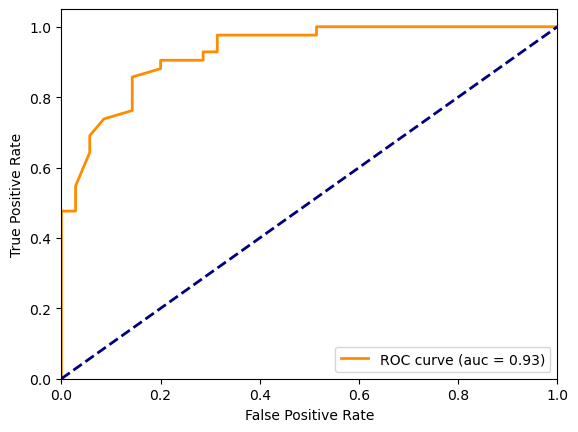

In [25]:
#plotting roc curve
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (auc = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

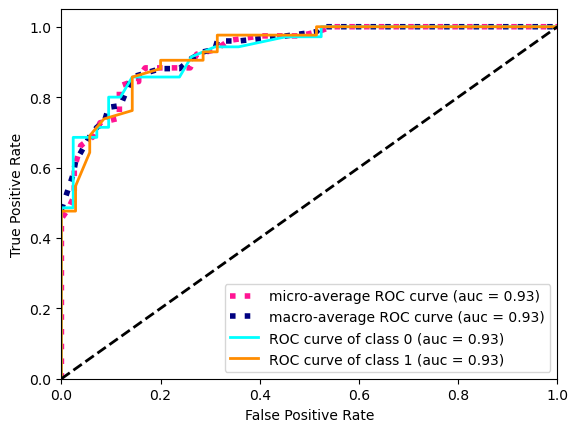

In [26]:
#plotting roc curve and auc  for each class
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
from numpy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(target_names))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(target_names)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(target_names)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (auc = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (auc = {roc_auc["macro"]:0.2f})',
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color, name in zip(range(len(target_names)), colors, target_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {name} (auc = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Random Forest Cross Validation

In [37]:
import warnings
warnings.filterwarnings("ignore")

N = 200
k = 5

skf = StratifiedKFold(n_splits=k)
thresholds = np.linspace(0, 1, N, endpoint=True)

metrics = {'accuracy':{}, 'precision':{}, 'recall':{}, 'f1':{}}
sc = StandardScaler()
for train_index, test_index in skf.split(x_grouped, y):
    X_train, X_test = x_grouped.iloc[train_index], x_grouped.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train)

    y_pred = rf_clf.predict_proba(X_test)
    
    
    for threshold in thresholds:
        metrics['accuracy'].setdefault(threshold,[]).append(accuracy_score(y_test==1, y_pred[:,1]>threshold))
        metrics['precision'].setdefault(threshold,[]).append(precision_score(y_test==1, y_pred[:,1]>threshold))
        metrics['recall'].setdefault(threshold,[]).append(recall_score(y_test==1, y_pred[:,1]>threshold))
        metrics['f1'].setdefault(threshold,[]).append(f1_score(y_test==1, y_pred[:,1]>threshold))

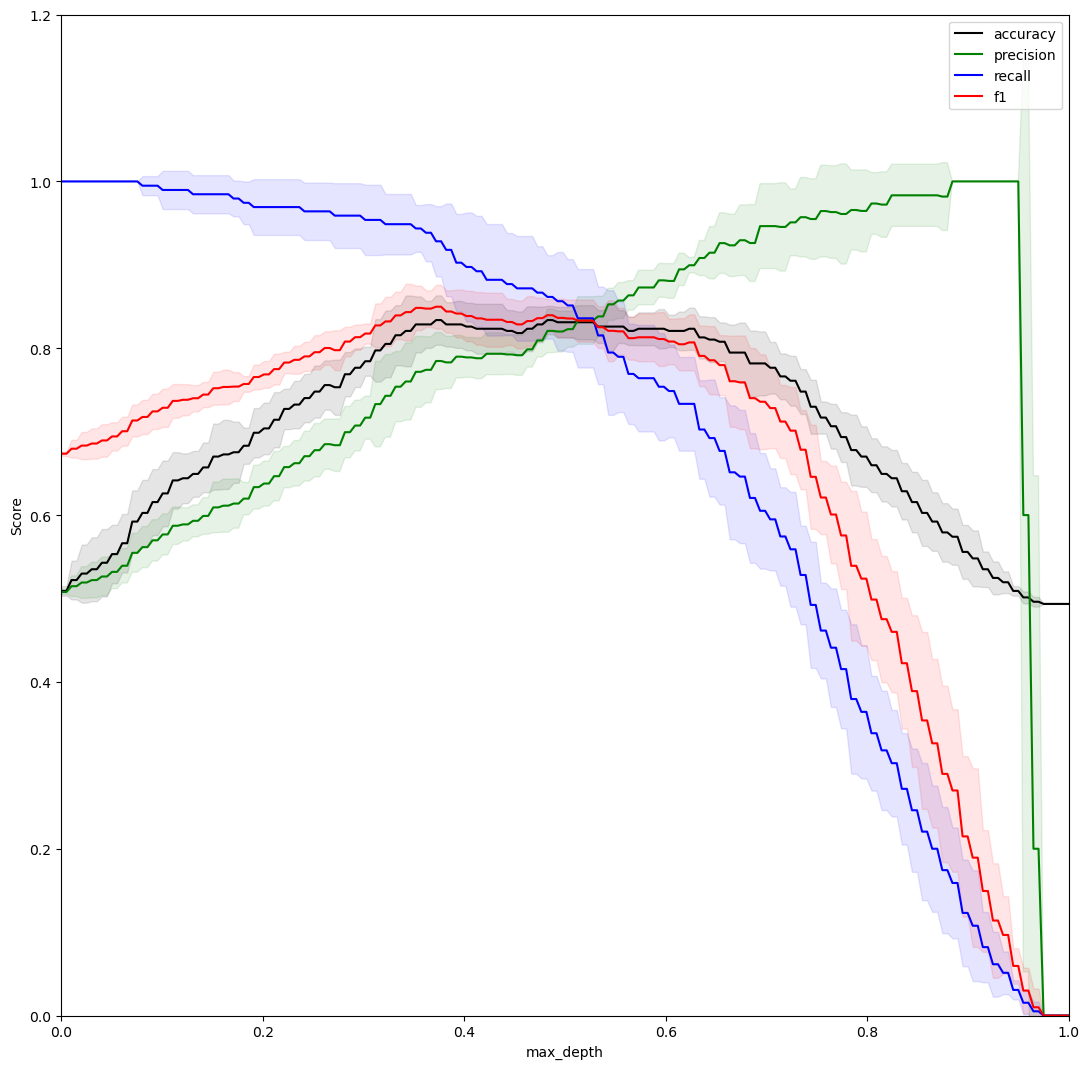

In [38]:
#metrics for class "1"
plt.figure(figsize=(13, 13))
plt.xlabel("max_depth")
plt.ylabel("Score")
ax = plt.gca()
ax.set_xlim(0.0, 1)
ax.set_ylim(0.0, 1.2)

for metric, color in zip(metrics.keys(), ['k', 'g', 'b', 'r']):
    metric_df = pd.DataFrame.from_dict(metrics[metric])
    ax.fill_between(thresholds, metric_df.mean() - metric_df.std(),
                    metric_df.mean() + metric_df.std(),
                    alpha=0.1, color=color)
    ax.plot(thresholds, metric_df.mean(), '-', color=color,
            alpha=1,
            label=metric)

plt.legend(loc="best")
plt.show()

# LDA

## Traning LDA

In [28]:

# LDA
X_train, X_test, y_train, y_test = train_test_split(x_grouped, y, test_size=0.2)
lda_clf = LinearDiscriminantAnalysis(n_components=1, store_covariance=True)
lda_clf.fit(X_train, y_train)

y_pred = lda_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.92      0.90      0.91        40

    accuracy                           0.91        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.91      0.91      0.91        77



## LDA Cross Validation

In [29]:
kf = KFold(n_splits=3, shuffle=True)
labels = np.array(target_names)
n_components = min(x_grouped.shape[1],labels.shape[0])
accuracy = []
precision = []
recall = []
f1 = []

for n in range(1,(n_components+1)):
    acc = []
    prec=[]
    rec = []
    f1_aux=[]
    for train_index, validation_index in kf.split(x_grouped):

        # Standardize data
        X_train = x_grouped.iloc[train_index]
        X_validation = x_grouped.iloc[validation_index]


        lda_clf = LinearDiscriminantAnalysis(n_components=1, )
        lda_clf.fit(X_train, y.iloc[train_index])

        y_validation = lda_clf.predict(X_validation)

        acc.append(accuracy_score(y.iloc[validation_index], y_validation))
        prec.append(precision_score(y.iloc[validation_index], y_validation, average=None))
        rec.append(recall_score(y.iloc[validation_index], y_validation, average=None))
        f1_aux.append(f1_score(y.iloc[validation_index], y_validation, average=None))
    accuracy.append(acc) 
    precision.append(prec)
    recall.append(rec)
    f1.append(f1_aux)

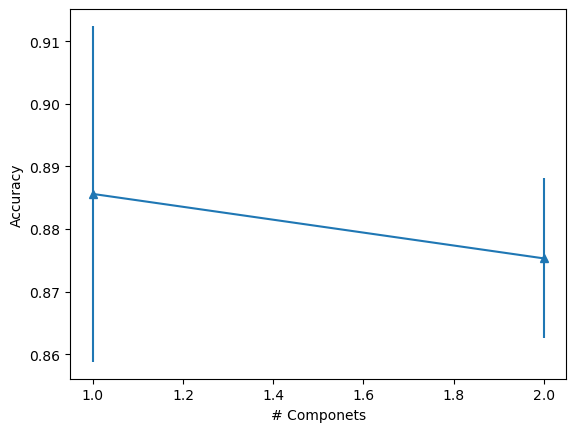

In [30]:
#accuracy for different number of components
accuracy = np.array(accuracy)
mean = accuracy.mean(axis=1)
std = accuracy.std(axis=1)
plt.figure()
plt.errorbar(range(1,n_components+1), mean, std, marker='^')
plt.xlabel('# Componets')
plt.ylabel('Accuracy')
plt.show()

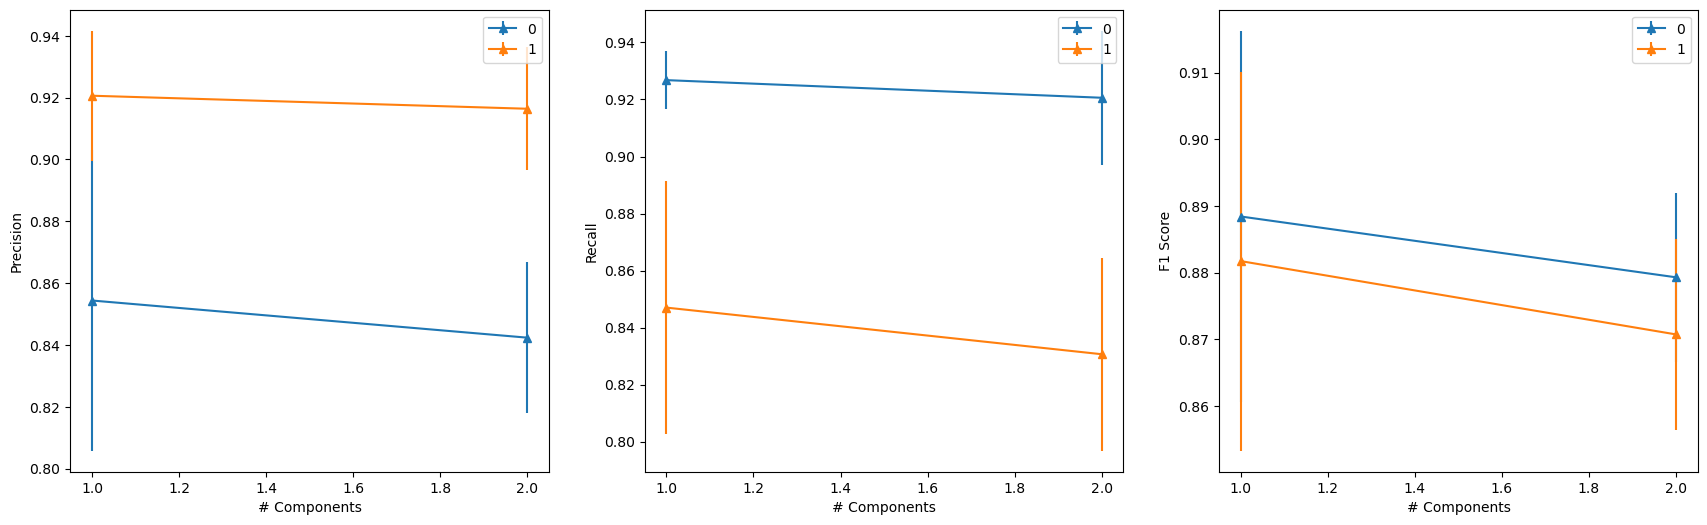

In [31]:
# metrics for different number of components
fig, axs = plt.subplots(1,3, figsize=(21, 6))
metrics = [precision, recall, f1]
metrics_names = ['Precision', 'Recall', 'F1 Score']

for i in range(len(metrics)):
    metric = np.array(metrics[i])
    mean = metric.mean(axis=1)
    std = metric.std(axis=1)

    
    for classes in range(len(labels)):
            axs[i].errorbar(range(1,n_components+1), 
                        mean[:,classes], 
                        std[:,classes], 
                        label=labels[classes], 
                        marker='^')
    
    axs[i].set_xlabel('# Components')
    axs[i].set_ylabel(metrics_names[i])
    axs[i].legend()

# Conclusion
The accuracy for the Random forest Classifier(aprox. 82%) is a little low when compared to the Linear Discriminant Analisys model(aprox 89%). As long as the data is well distributed and has good linear characteristics LDA will have a (depending on the point of view)"satisfatory" performance both in predicting who will need ICU and who won't too.


Ps: it's my first Kaggle's submission, hope you enjoy it and feel free to comment!